In [3]:
conda install pandas numpy seaborn matplotlib plotly scikit-learn scipy

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, model_selection, metrics
import scipy as sp

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


# Load datasets

In [17]:
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_demo.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [6]:
df_experiment = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [7]:
df_web = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


# Are the primary clients younger or older?

# Age analyzis

In [12]:
age_frequency_table = df_demo['age'].value_counts()
age_frequency_table

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
95.5      1
94.5      1
13.5      1
Name: count, Length: 166, dtype: int64

In [10]:
#top 5 age 
top_five_age = age_frequency_table.head()
top_five_age

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
Name: count, dtype: int64

# Display the distribution of age using a bar chart. (SEABORN)

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_32961/570255995.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_five_age.index, x=top_five_age.values, palette='viridis')


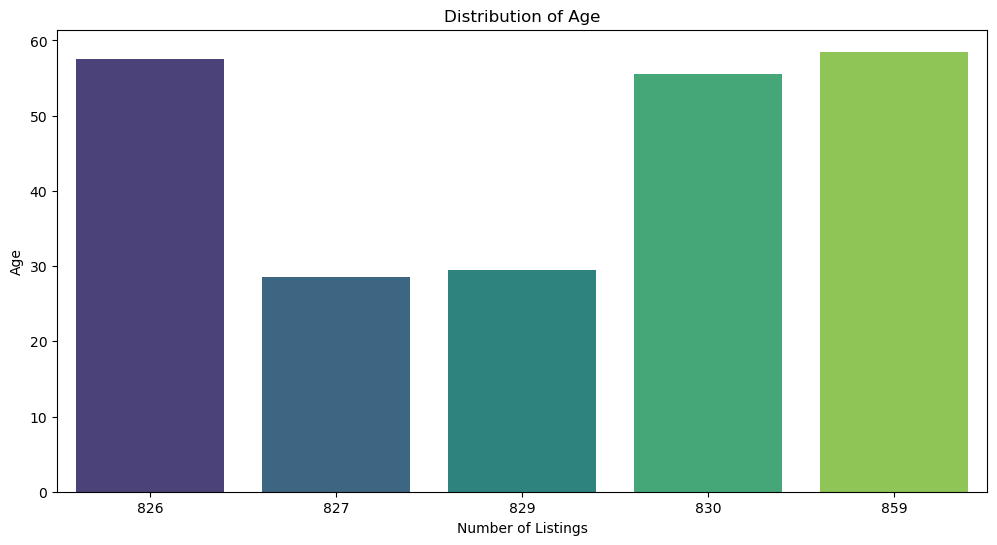

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the distribution of products across different categories
age_counts = df_demo['age'].value_counts()

# display the top 5 ages 
top_five_age = age_counts.head(5)

# Plotting the bar chart for top 20 categories with swapped axes
plt.figure(figsize=(12, 6))
sns.barplot(y=top_five_age.index, x=top_five_age.values, palette='viridis')
plt.ylabel('Age')
plt.xlabel('Number of Listings')
plt.title('Distribution of Age')
plt.show()

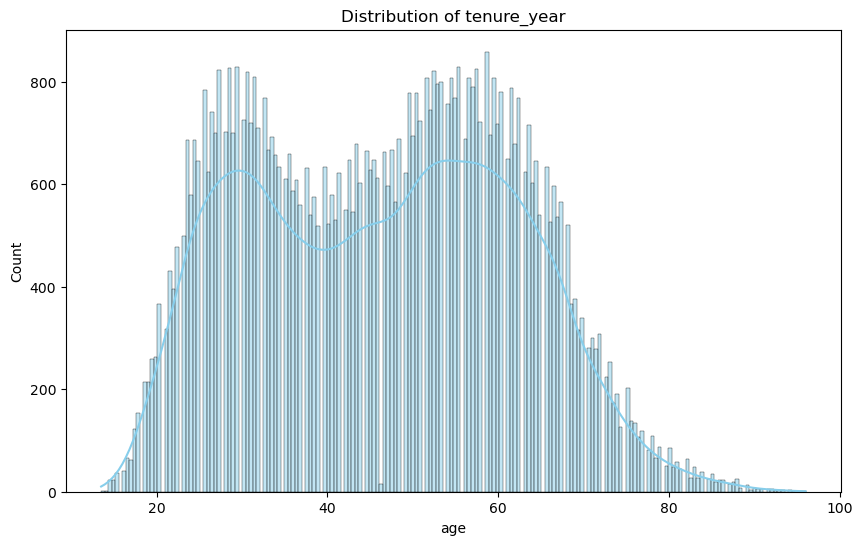

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['age']<100]["age"], bins=200, kde=True, color="skyblue")
plt.title('Distribution of tenure_year')
plt.show()

# Are the primary clients  new or long-standing?

In [25]:
tenure_frequency_table = df_demo['tenure_year'].value_counts()
tenure_frequency_table

tenure_year
6.00000     7092
5.00000     6955
7.00000     4955
4.00000     4687
15.00000    4564
8.00000     4045
14.00000    3646
12.00000    3631
13.00000    3607
9.00000     3357
11.00000    2920
10.00000    2775
16.00000    2714
21.00000    2257
20.00000    1580
22.00000    1492
17.00000    1373
23.00000    1279
18.00000    1206
19.00000    1153
24.00000     846
26.00000     660
27.00000     632
28.00000     507
25.00000     484
3.00000      449
29.00000     309
30.00000     303
33.00000     206
32.00000     191
34.00000     175
31.00000     166
35.00000     102
2.00000       81
36.00000      36
37.00000      35
38.00000      33
48.00000      16
12.05295      14
39.00000       9
40.00000       9
55.00000       9
50.00000       8
42.00000       6
47.00000       6
43.00000       6
46.00000       5
51.00000       5
49.00000       4
44.00000       3
52.00000       2
54.00000       1
41.00000       1
45.00000       1
62.00000       1
Name: count, dtype: int64

In [26]:
top_five_tenure = tenure_frequency_table.head()
top_five_tenure 

tenure_year
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
Name: count, dtype: int64

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_32961/1827267715.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_five_tenure.index, x=top_five_tenure.values, palette='viridis')


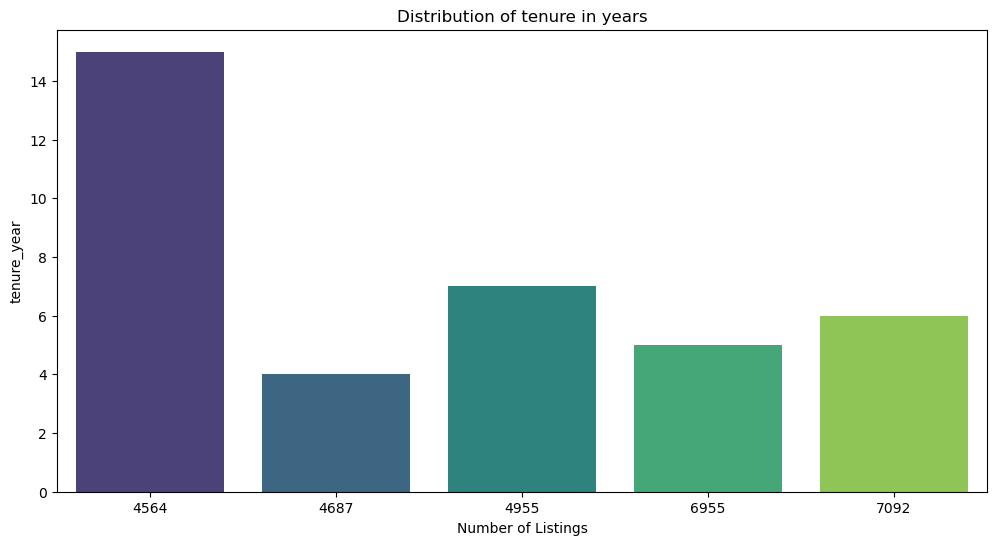

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the distribution of products across different categories
tenure_counts = df_demo['tenure_year'].value_counts()

# display the top 5 ages 
top_five_tenure = tenure_counts.head(5)

# Plotting the bar chart for top 20 categories with swapped axes
plt.figure(figsize=(12, 6))
sns.barplot(y=top_five_tenure.index, x=top_five_tenure.values, palette='viridis')
plt.ylabel('tenure_year')
plt.xlabel('Number of Listings')
plt.title('Distribution of tenure in years')
plt.show()

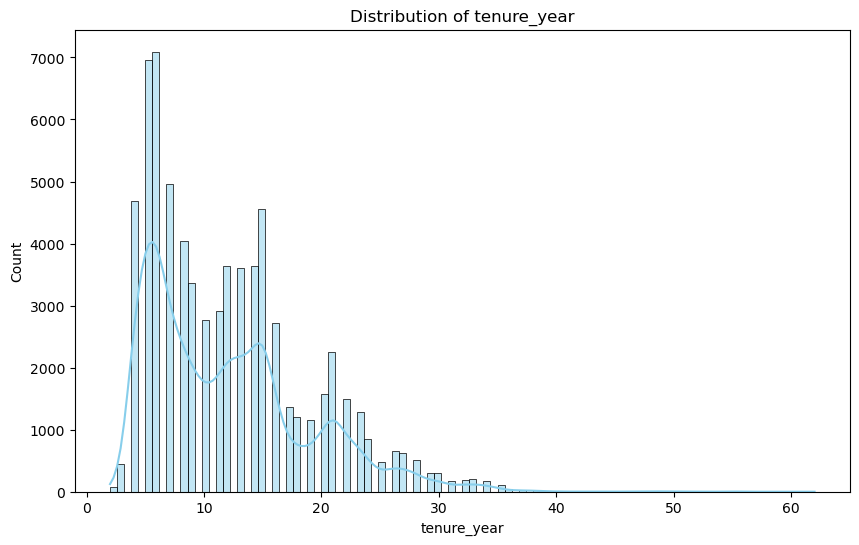

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['tenure_year']<100]["tenure_year"], bins=100, kde=True, color="skyblue")
plt.title('Distribution of tenure_year')
plt.show()

In [38]:
# Creating a crosstab between product category and isBestSeller status
crosstab = pd.crosstab(df_demo['age'], df_demo['tenure_year'])

crosstab

tenure_year,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,55.0,62.0
age,,,,,,,,,,,,,,,,,,,,,
13.5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.5,1,0,9,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.0,0,4,6,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.5,0,0,11,9,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94.0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
